## **Predicting the Quarterly Net Income for Walmart**


In [1]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Reading the Data
df=pd.read_excel('Walmart Quarterly Net Income.xlsx')
df.head()

,Date,Quarterly Net Income
0,2009-01-31,3772
1,2009-04-30,3022
2,2009-07-31,3472
3,2009-10-31,3144
4,2010-01-31,4732


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  56 non-null     datetime64[ns]
 1   Quarterly Net Income  56 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [4]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quarterly Net Income
Date,
2009-01-31,3772
2009-04-30,3022
2009-07-31,3472
2009-10-31,3144
2010-01-31,4732


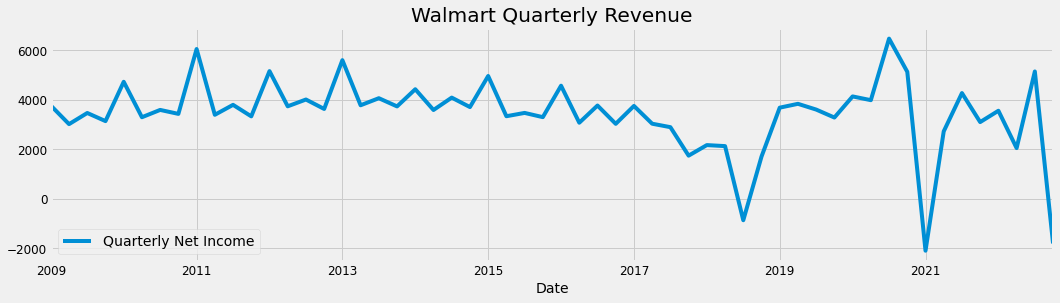

In [5]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Walmart Quarterly Revenue')
plt.show()

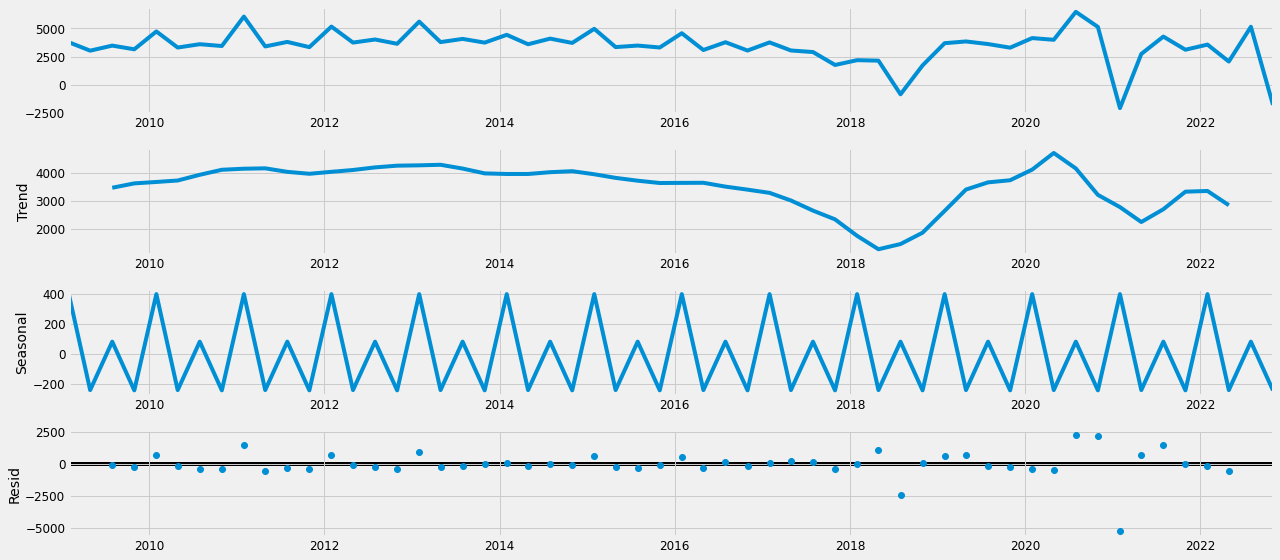

In [6]:
# Decomposition the data 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

C:\Users\ravit\AppData\Local\Temp\ipykernel_20844\2151717043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Quarterly Net Income']
C:\Users\ravit\AppData\Local\Temp\ipykernel_20844\2151717043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Quarterly Net Income']


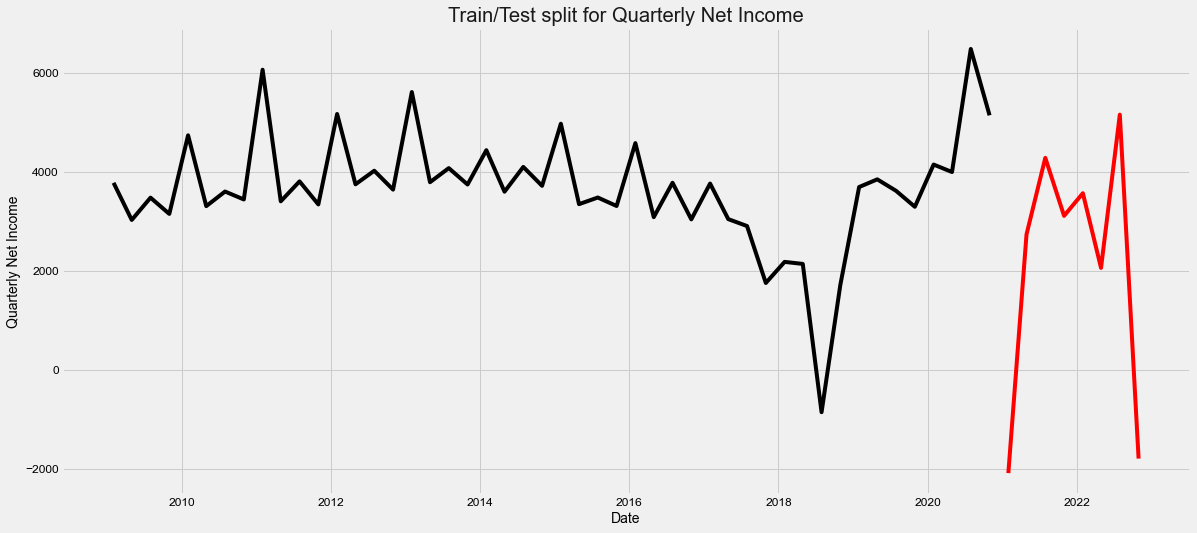

In [7]:
# Dividing the data into training and testing
# Ploting the data
import seaborn as sns 
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2020-12", format='%Y-%m')]
train['train'] = train['Quarterly Net Income']
del train['Date']
del train['Quarterly Net Income']
test = df[df['Date'] >= pd.to_datetime("2020-12", format='%Y-%m')]
del test['Date']
test['test'] = test['Quarterly Net Income']
del test['Quarterly Net Income']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Quarterly Net Income")
plt.ylabel("Quarterly Net Income")
plt.xlabel('Date')
sns.set()
plt.show()

## **Arima Model**

In [8]:
# Applying ARIMA Model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=806.808, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=816.188, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=810.220, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=813.280, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=930.029, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=813.033, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=807.215, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=808.238, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=807.490, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=810.846, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=814.300, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=808.793, Time=0.39 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=808.855, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=812.069, Time=0.21 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept


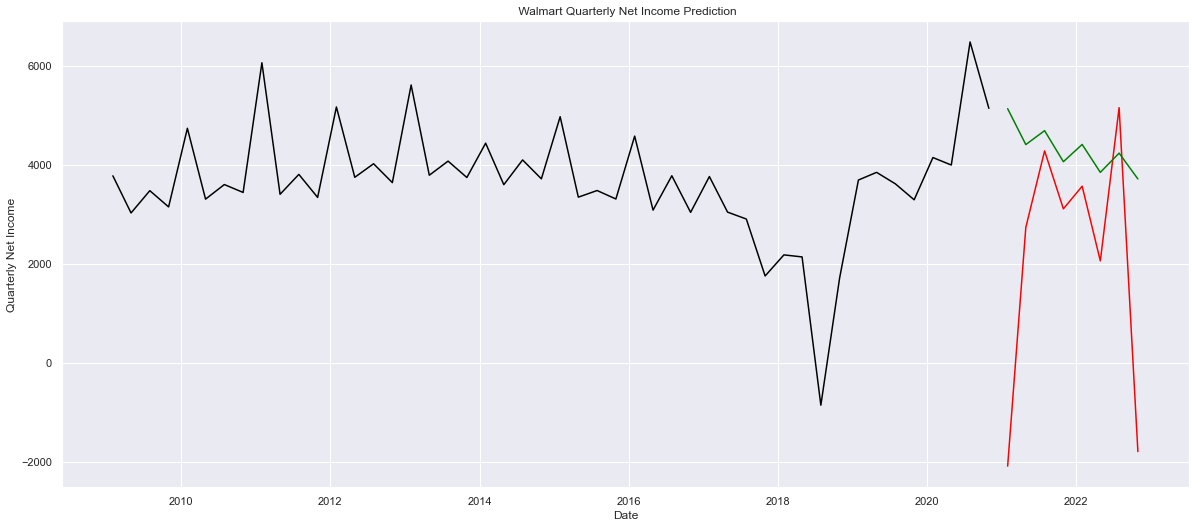

In [9]:
# Plotting the prediction
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title(" Walmart Quarterly Net Income Prediction")
plt.ylabel("Quarterly Net Income")
plt.xlabel('Date')
sns.set()
plt.show()

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  3373.786162000279


## **SARIMA Model**

In [11]:
df=pd.read_excel('Walmart Quarterly Net Income.xlsx')
df = df.set_index('Date')

In [12]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT w

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1082.5815865258703
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1052.8586071233105
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:789.2079313686772


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1769.6617831987073
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1020.8729800618468
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1020.4488867028788
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:791.3823071810801


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1962.7371302421666
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1050.22869033866
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1032.0654764887151
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:788.9832088149612


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1579.9162489620678
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1014.5628810646533


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1015.3094329265442
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:790.4401596104541


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:992.683506656517


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:993.3891218145685
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:788.1179275575922


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1592.3431574644476
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:993.1115292372073


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:995.7822324412598
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:787.6431022988896


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1125.1787085854592
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:969.68301730521
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:971.3894552156285
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:776.9929186105628


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1400.8286531959113
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:971.380631727883


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:973.0772421166877
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:775.1033525367498


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1009.667799976717
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1009.4940988338169
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:788.9311602990225


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT w

SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2005.6345245341981
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1007.9820972151714
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1009.9667949391084
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:790.2406118225929


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1795.6511927937963
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:989.3447802926919
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:992.447008831613
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:790.8218261729597


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1721.789218457725


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:993.2618953598263


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:993.5720769084693
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:790.0123615988276


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:982.6789076142702
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:984.4320300371705
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:785.3125338753525


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT w

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1544.8111378163792
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:984.4085969106386


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:986.4037590768473


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:784.1617052183926


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1108.8554689750517
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:971.6211164280319
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:973.2820440887572
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:778.823882050679


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1879.2339757352752
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:972.9639109688214


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:975.2608566812304


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:777.4611092547093


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1398.488933720974


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0253      0.307      0.082      0.934      -0.575       0.626
ma.L1         -0.7526      0.141     -5.332      0.000      -1.029      -0.476
ar.S.L12      -0.5014      0.218     -2.300      0.021      -0.929      -0.074
sigma2      3.299e+06   6.54e+05      5.045      0.000    2.02e+06    4.58e+06


In [15]:
prediction = result.get_prediction(start = pd.to_datetime('2021-04-30'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Quarterly Net Income,upper Quarterly Net Income
2021-04-30,-1654.421889,5465.365348
2021-07-31,-2733.527648,4386.259526
2021-10-31,-608.785230,6511.001910
2022-01-31,991.979169,8111.766289
2022-04-30,45.244418,7165.031526
2022-07-31,-127.355867,6992.431234
2022-10-31,-161.408001,6958.379097


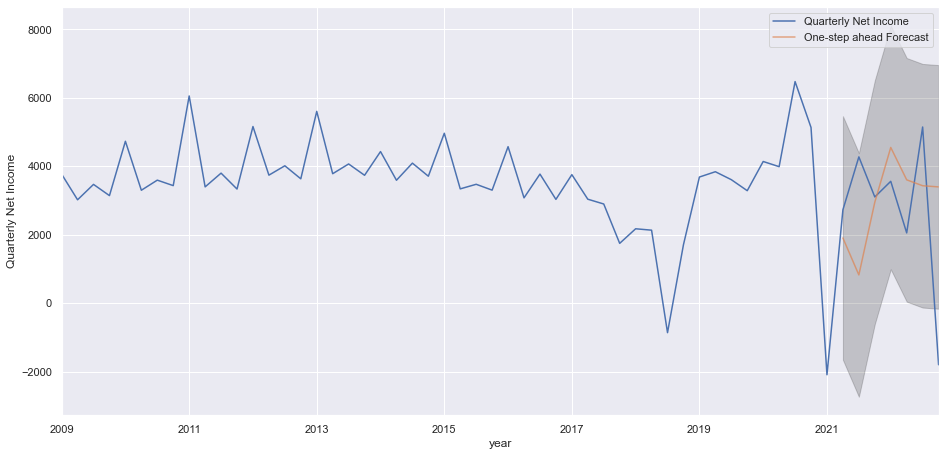

In [16]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Net Income')
plt.legend()
plt.show()

In [17]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-04-30':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 6562726.660534659
The Root Mean Squared Error of our forecasts is 2561.7819307143727


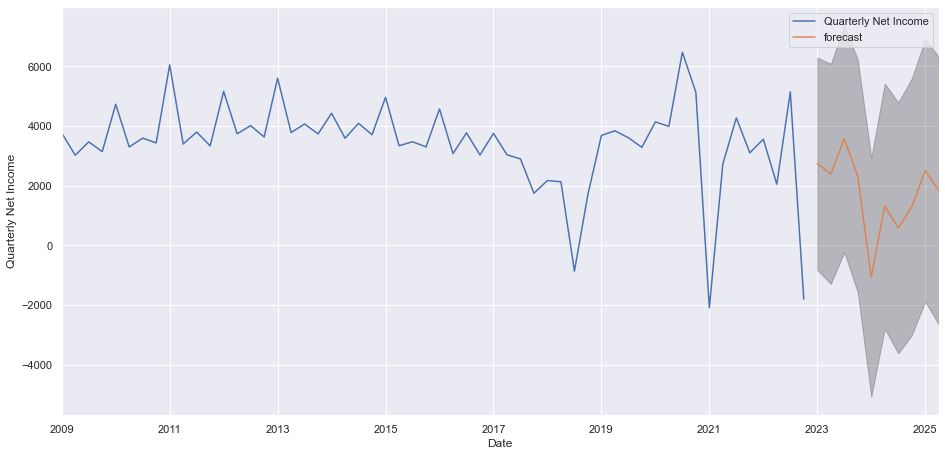

In [18]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Net Income')

plt.legend()
plt.show()


## **DNN MODEL**

In [19]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [20]:
df=pd.read_excel('Walmart Quarterly Net Income.xlsx')

df = df.set_index('Date')


In [21]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [23]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 1s 21ms/step - loss: 10397825.0000 - mse: 10397825.0000 - mae: 3072.6726 - val_loss: 7986049.5000 - val_mse: 7986049.5000 - val_mae: 2522.6152
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 6700009.0000 - mse: 6700009.0000 - mae: 2413.0437 - val_loss: 8489033.0000 - val_mse: 8489033.0000 - val_mae: 2491.5454
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 5305328.5000 - mse: 5305328.5000 - mae: 2086.3992 - val_loss: 8537176.0000 - val_mse: 8537176.0000 - val_mae: 2424.1121
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 4452226.5000 - mse: 4452226.5000 - mae: 1854.4752 - val_loss: 8702546.0000 - val_mse: 8702546.0000 - val_mae: 2435.6445
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 3831167.2500 - mse: 3831167.2500 - mae: 1662.9531 - val_loss: 9023541.0000 - val_mse: 9023541.0000 - val_mae: 2541.0049
Epoch 6/500
12/12 [=============

Epoch 43/500
12/12 [==============================] - 0s 4ms/step - loss: 2247441.0000 - mse: 2247441.0000 - mae: 1062.3058 - val_loss: 11262293.0000 - val_mse: 11262293.0000 - val_mae: 2901.0857
Epoch 44/500
12/12 [==============================] - 0s 6ms/step - loss: 2240669.2500 - mse: 2240669.2500 - mae: 1062.7759 - val_loss: 11236844.0000 - val_mse: 11236844.0000 - val_mae: 2893.1414
Epoch 45/500
12/12 [==============================] - 0s 4ms/step - loss: 2228853.7500 - mse: 2228853.7500 - mae: 1061.8096 - val_loss: 11395627.0000 - val_mse: 11395627.0000 - val_mae: 2916.1243
Epoch 46/500
12/12 [==============================] - 0s 4ms/step - loss: 2222022.5000 - mse: 2222022.5000 - mae: 1061.2507 - val_loss: 11510292.0000 - val_mse: 11510292.0000 - val_mae: 2927.8975
Epoch 47/500
12/12 [==============================] - 0s 4ms/step - loss: 2204999.7500 - mse: 2204999.7500 - mae: 1053.8917 - val_loss: 11580721.0000 - val_mse: 11580721.0000 - val_mae: 2933.3301
Epoch 48/500
12/12 [

Epoch 85/500
12/12 [==============================] - 0s 4ms/step - loss: 2001102.2500 - mse: 2001102.2500 - mae: 1041.0891 - val_loss: 12078543.0000 - val_mse: 12078543.0000 - val_mae: 2961.4099
Epoch 86/500
12/12 [==============================] - 0s 4ms/step - loss: 2011151.6250 - mse: 2011151.6250 - mae: 1043.8270 - val_loss: 12148879.0000 - val_mse: 12148879.0000 - val_mae: 2962.8767
Epoch 87/500
12/12 [==============================] - 0s 5ms/step - loss: 1998790.0000 - mse: 1998790.0000 - mae: 1041.8818 - val_loss: 11973861.0000 - val_mse: 11973861.0000 - val_mae: 2937.7278
Epoch 88/500
12/12 [==============================] - 0s 4ms/step - loss: 1965106.5000 - mse: 1965106.5000 - mae: 1023.6374 - val_loss: 12212003.0000 - val_mse: 12212003.0000 - val_mae: 2955.4219
Epoch 89/500
12/12 [==============================] - 0s 4ms/step - loss: 1920977.1250 - mse: 1920977.1250 - mae: 1013.5028 - val_loss: 12384859.0000 - val_mse: 12384859.0000 - val_mae: 2981.0300
Epoch 90/500
12/12 [

Epoch 127/500
12/12 [==============================] - 0s 4ms/step - loss: 1808258.5000 - mse: 1808258.5000 - mae: 987.2794 - val_loss: 13600404.0000 - val_mse: 13600404.0000 - val_mae: 3008.6770
Epoch 128/500
12/12 [==============================] - 0s 4ms/step - loss: 1798343.2500 - mse: 1798343.2500 - mae: 973.0203 - val_loss: 13843627.0000 - val_mse: 13843627.0000 - val_mae: 3018.0088
Epoch 129/500
12/12 [==============================] - 0s 4ms/step - loss: 1772462.2500 - mse: 1772462.2500 - mae: 968.2094 - val_loss: 13243211.0000 - val_mse: 13243211.0000 - val_mae: 2950.4666
Epoch 130/500
12/12 [==============================] - 0s 4ms/step - loss: 1782180.6250 - mse: 1782180.6250 - mae: 980.1637 - val_loss: 13279497.0000 - val_mse: 13279497.0000 - val_mae: 2963.6697
Epoch 131/500
12/12 [==============================] - 0s 4ms/step - loss: 1814835.8750 - mse: 1814835.8750 - mae: 991.9481 - val_loss: 13331475.0000 - val_mse: 13331475.0000 - val_mae: 2955.7227
Epoch 132/500
12/12 

Epoch 169/500
12/12 [==============================] - 0s 5ms/step - loss: 1699167.2500 - mse: 1699167.2500 - mae: 923.4620 - val_loss: 13817837.0000 - val_mse: 13817837.0000 - val_mae: 2863.4590
Epoch 170/500
12/12 [==============================] - 0s 4ms/step - loss: 1690202.6250 - mse: 1690202.6250 - mae: 930.3544 - val_loss: 13116240.0000 - val_mse: 13116240.0000 - val_mae: 2785.8311
Epoch 171/500
12/12 [==============================] - 0s 5ms/step - loss: 1638859.2500 - mse: 1638859.2500 - mae: 917.6614 - val_loss: 13351072.0000 - val_mse: 13351072.0000 - val_mae: 2825.6602
Epoch 172/500
12/12 [==============================] - 0s 4ms/step - loss: 1646850.8750 - mse: 1646850.8750 - mae: 912.7762 - val_loss: 13799444.0000 - val_mse: 13799444.0000 - val_mae: 2885.0393
Epoch 173/500
12/12 [==============================] - 0s 4ms/step - loss: 1649511.6250 - mse: 1649511.6250 - mae: 906.0757 - val_loss: 14018737.0000 - val_mse: 14018737.0000 - val_mae: 2886.4675
Epoch 174/500
12/12 

Epoch 211/500
12/12 [==============================] - 0s 5ms/step - loss: 1426554.1250 - mse: 1426554.1250 - mae: 793.7767 - val_loss: 15737229.0000 - val_mse: 15737229.0000 - val_mae: 2983.0222
Epoch 212/500
12/12 [==============================] - 0s 4ms/step - loss: 1473214.8750 - mse: 1473214.8750 - mae: 815.7021 - val_loss: 16019147.0000 - val_mse: 16019147.0000 - val_mae: 3019.3167
Epoch 213/500
12/12 [==============================] - 0s 5ms/step - loss: 1476291.7500 - mse: 1476291.7500 - mae: 815.2161 - val_loss: 16229023.0000 - val_mse: 16229023.0000 - val_mae: 3030.0491
Epoch 214/500
12/12 [==============================] - 0s 5ms/step - loss: 1442214.3750 - mse: 1442214.3750 - mae: 798.4188 - val_loss: 16145852.0000 - val_mse: 16145852.0000 - val_mae: 3009.9504
Epoch 215/500
12/12 [==============================] - 0s 4ms/step - loss: 1414375.8750 - mse: 1414375.8750 - mae: 789.4936 - val_loss: 16076957.0000 - val_mse: 16076957.0000 - val_mae: 3009.9407
Epoch 216/500
12/12 

Epoch 253/500
12/12 [==============================] - 0s 5ms/step - loss: 1304288.1250 - mse: 1304288.1250 - mae: 748.9822 - val_loss: 16980864.0000 - val_mse: 16980864.0000 - val_mae: 3084.4812
Epoch 254/500
12/12 [==============================] - 0s 5ms/step - loss: 1291403.3750 - mse: 1291403.3750 - mae: 741.5647 - val_loss: 16831724.0000 - val_mse: 16831724.0000 - val_mae: 3056.8577
Epoch 255/500
12/12 [==============================] - 0s 4ms/step - loss: 1277620.5000 - mse: 1277620.5000 - mae: 735.8123 - val_loss: 16878092.0000 - val_mse: 16878092.0000 - val_mae: 3068.0276
Epoch 256/500
12/12 [==============================] - 0s 5ms/step - loss: 1286057.8750 - mse: 1286057.8750 - mae: 742.7709 - val_loss: 17227522.0000 - val_mse: 17227522.0000 - val_mae: 3098.0752
Epoch 257/500
12/12 [==============================] - 0s 4ms/step - loss: 1279672.5000 - mse: 1279672.5000 - mae: 734.8709 - val_loss: 16907562.0000 - val_mse: 16907562.0000 - val_mae: 3054.5129
Epoch 258/500
12/12 

Epoch 295/500
12/12 [==============================] - 0s 4ms/step - loss: 1202342.2500 - mse: 1202342.2500 - mae: 708.0758 - val_loss: 17206246.0000 - val_mse: 17206246.0000 - val_mae: 3098.0957
Epoch 296/500
12/12 [==============================] - 0s 5ms/step - loss: 1190801.1250 - mse: 1190801.1250 - mae: 710.4806 - val_loss: 17215092.0000 - val_mse: 17215092.0000 - val_mae: 3108.5254
Epoch 297/500
12/12 [==============================] - 0s 5ms/step - loss: 1208568.6250 - mse: 1208568.6250 - mae: 717.8661 - val_loss: 17272058.0000 - val_mse: 17272058.0000 - val_mae: 3106.3269
Epoch 298/500
12/12 [==============================] - 0s 4ms/step - loss: 1183262.6250 - mse: 1183262.6250 - mae: 706.1925 - val_loss: 17250178.0000 - val_mse: 17250178.0000 - val_mae: 3112.6843
Epoch 299/500
12/12 [==============================] - 0s 4ms/step - loss: 1204026.0000 - mse: 1204026.0000 - mae: 717.2678 - val_loss: 17339016.0000 - val_mse: 17339016.0000 - val_mae: 3133.8792
Epoch 300/500
12/12 

Epoch 337/500
12/12 [==============================] - 0s 4ms/step - loss: 1133972.0000 - mse: 1133972.0000 - mae: 671.5771 - val_loss: 16957358.0000 - val_mse: 16957358.0000 - val_mae: 3089.0410
Epoch 338/500
12/12 [==============================] - 0s 4ms/step - loss: 1114558.0000 - mse: 1114558.0000 - mae: 662.9026 - val_loss: 17020128.0000 - val_mse: 17020128.0000 - val_mae: 3096.2019
Epoch 339/500
12/12 [==============================] - 0s 4ms/step - loss: 1120262.6250 - mse: 1120262.6250 - mae: 669.7297 - val_loss: 17013882.0000 - val_mse: 17013882.0000 - val_mae: 3082.5938
Epoch 340/500
12/12 [==============================] - 0s 4ms/step - loss: 1100202.1250 - mse: 1100202.1250 - mae: 652.2869 - val_loss: 16586097.0000 - val_mse: 16586097.0000 - val_mae: 3047.5354
Epoch 341/500
12/12 [==============================] - 0s 4ms/step - loss: 1120005.7500 - mse: 1120005.7500 - mae: 666.5262 - val_loss: 16861530.0000 - val_mse: 16861530.0000 - val_mae: 3072.0674
Epoch 342/500
12/12 

Epoch 379/500
12/12 [==============================] - 0s 5ms/step - loss: 1071370.8750 - mse: 1071370.8750 - mae: 633.3508 - val_loss: 16936318.0000 - val_mse: 16936318.0000 - val_mae: 3090.0354
Epoch 380/500
12/12 [==============================] - 0s 4ms/step - loss: 1088532.5000 - mse: 1088532.5000 - mae: 642.4178 - val_loss: 17146532.0000 - val_mse: 17146532.0000 - val_mae: 3110.7754
Epoch 381/500
12/12 [==============================] - 0s 4ms/step - loss: 1076875.1250 - mse: 1076875.1250 - mae: 630.9703 - val_loss: 17126946.0000 - val_mse: 17126946.0000 - val_mae: 3113.4456
Epoch 382/500
12/12 [==============================] - 0s 4ms/step - loss: 1084905.1250 - mse: 1084905.1250 - mae: 640.2394 - val_loss: 17233596.0000 - val_mse: 17233596.0000 - val_mae: 3118.4304
Epoch 383/500
12/12 [==============================] - 0s 4ms/step - loss: 1075689.1250 - mse: 1075689.1250 - mae: 636.9243 - val_loss: 17152558.0000 - val_mse: 17152558.0000 - val_mae: 3120.0254
Epoch 384/500
12/12 

Epoch 421/500
12/12 [==============================] - 0s 3ms/step - loss: 1044075.1875 - mse: 1044075.1875 - mae: 629.4417 - val_loss: 17234342.0000 - val_mse: 17234342.0000 - val_mae: 3137.3469
Epoch 422/500
12/12 [==============================] - 0s 4ms/step - loss: 1031259.7500 - mse: 1031259.7500 - mae: 628.7913 - val_loss: 17282266.0000 - val_mse: 17282266.0000 - val_mae: 3145.3738
Epoch 423/500
12/12 [==============================] - 0s 3ms/step - loss: 1034603.7500 - mse: 1034603.7500 - mae: 637.0688 - val_loss: 17334882.0000 - val_mse: 17334882.0000 - val_mae: 3149.4971
Epoch 424/500
12/12 [==============================] - 0s 3ms/step - loss: 1021144.5625 - mse: 1021144.5625 - mae: 624.1345 - val_loss: 17279326.0000 - val_mse: 17279326.0000 - val_mae: 3153.5457
Epoch 425/500
12/12 [==============================] - 0s 4ms/step - loss: 1029796.3750 - mse: 1029796.3750 - mae: 636.0498 - val_loss: 17446218.0000 - val_mse: 17446218.0000 - val_mae: 3160.4111
Epoch 426/500
12/12 

12/12 [==============================] - 0s 4ms/step - loss: 932709.4375 - mse: 932709.4375 - mae: 610.6125 - val_loss: 16594644.0000 - val_mse: 16594644.0000 - val_mae: 3196.0393
Epoch 464/500
12/12 [==============================] - 0s 4ms/step - loss: 927633.9375 - mse: 927633.9375 - mae: 600.3446 - val_loss: 16360244.0000 - val_mse: 16360244.0000 - val_mae: 3165.1453
Epoch 465/500
12/12 [==============================] - 0s 4ms/step - loss: 920908.0625 - mse: 920908.0625 - mae: 597.3159 - val_loss: 16479817.0000 - val_mse: 16479817.0000 - val_mae: 3188.8293
Epoch 466/500
12/12 [==============================] - 0s 3ms/step - loss: 924415.1875 - mse: 924415.1875 - mae: 609.1197 - val_loss: 16469669.0000 - val_mse: 16469669.0000 - val_mae: 3176.7695
Epoch 467/500
12/12 [==============================] - 0s 4ms/step - loss: 917566.9375 - mse: 917566.9375 - mae: 598.0161 - val_loss: 16130277.0000 - val_mse: 16130277.0000 - val_mae: 3139.7297
Epoch 468/500
12/12 [=======================

In [24]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [25]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 919.19; Train Mean Absolute Error(MAE) : 580.17 
[844912.1875, 844912.1875, 580.17041015625]
[15373329.0, 15373329.0, 3059.468017578125]
Test Root Mean Squared Error(RMSE): 3920.88; Test Mean Absolute Error(MAE) : 3059.47 


In [26]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

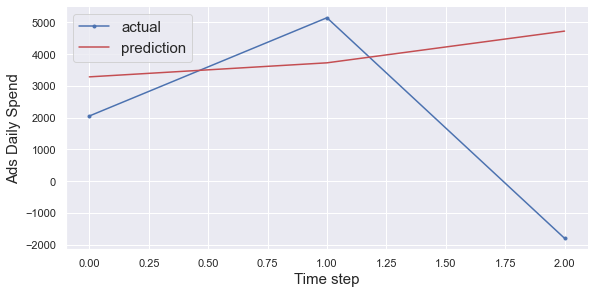

In [27]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [28]:
df=pd.read_excel('Walmart Quarterly Net Income.xlsx')
df.head()

,Date,Quarterly Net Income
0,2009-01-31,3772
1,2009-04-30,3022
2,2009-07-31,3472
3,2009-10-31,3144
4,2010-01-31,4732


In [29]:
df = df.set_index('Date')
df.head()

,Quarterly Net Income
Date,
2009-01-31,3772
2009-04-30,3022
2009-07-31,3472
2009-10-31,3144
2010-01-31,4732


In [30]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [31]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [32]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (8, 4, 1)
y_test.shape:  (8, 1)


In [33]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [34]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 3s 606ms/step - loss: 0.3822 - val_loss: 0.1531
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2012 - val_loss: 0.0856
Epoch 3/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0839 - val_loss: 0.0544
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0290 - val_loss: 0.0613
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0308 - val_loss: 0.0841
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0540 - val_loss: 0.0916
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0573 - val_loss: 0.0821
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0433 - val_loss: 0.0669
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0237 - val_loss: 0.0566
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0199 - val_loss: 0.0526
Epoch 11/100
2/2 [

In [35]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 0.4587 - val_loss: 0.2108
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.3189 - val_loss: 0.1503
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.2007 - val_loss: 0.1008
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1039 - val_loss: 0.0658
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0374 - val_loss: 0.0535
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0169 - val_loss: 0.0676
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0407 - val_loss: 0.0840
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0583 - val_loss: 0.0802
Epoch 9/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0450 - val_loss: 0.0669
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0238 - val_loss: 0.0570
Epoch 11/100
2/2 [===

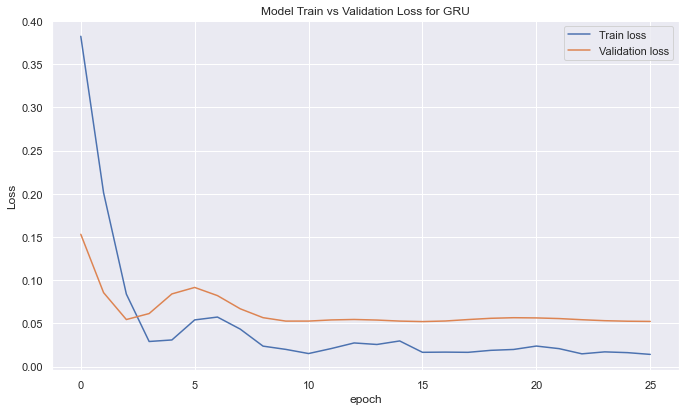

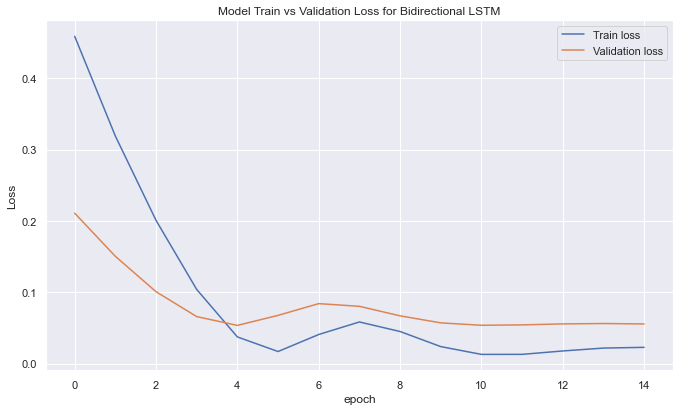

In [36]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

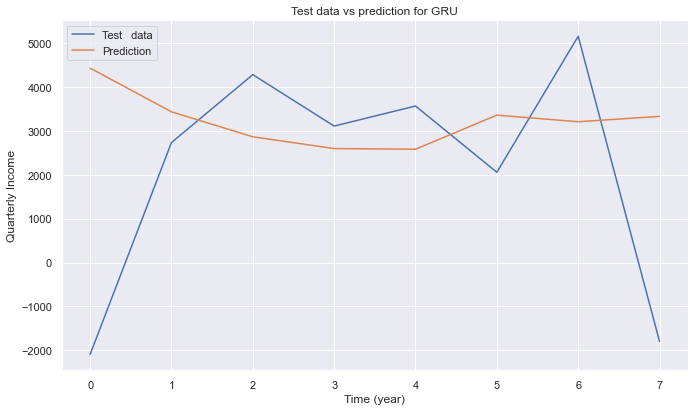

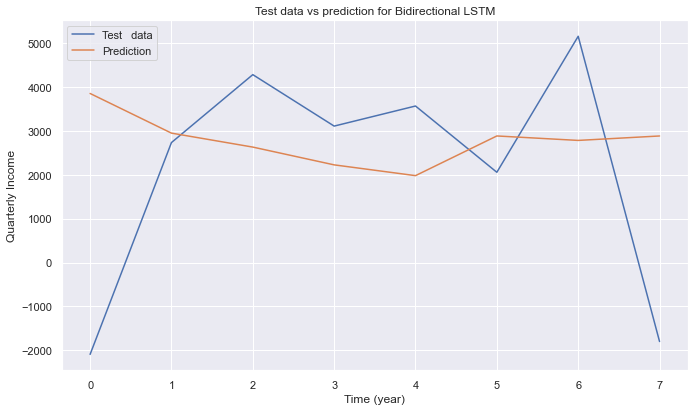

In [37]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [38]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 2311.8309
Root Mean Square Error: 3120.6002

Bidirectional LSTM:
Mean Absolute Error: 2268.0282
Root Mean Square Error: 2947.6046



In [39]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 0.3342
Root Mean Square Error: 0.4511

Bidirectional LSTM:
Mean Absolute Error: 0.3279
Root Mean Square Error: 0.4261



R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
